In [4]:
import training
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [5]:
FOLDER = "SMOTE+ENN"
x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
smote_enn_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
smote_enn_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
smote_enn_svm = training.SVM(n_iters=2000, batch_size=100, lambda_param=1, learning_rate=0.001); smote_enn_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 14:13:24 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE+ENN/SMOTE+ENN_KNN.pickle.
2024-03-28 14:13:24 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE+ENN/SMOTE+ENN_Logistic_Regression.pickle.


/home/michael/Desktop/ML92/ML-92/training.py:99: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  hinge = 1 - y_batch * (np.dot(X_batch, w) - b)


In [6]:
smote_enn_results = dict()
smote_enn_knn_results = training.Results(smote_enn_knn, x_test, y_test)
smote_enn_lr_results = training.Results(smote_enn_lr, x_test, y_test)
smote_enn_svm_results = training.Results(smote_enn_svm, x_test, y_test)
smote_enn_knn_results.calculate_metrics()
smote_enn_lr_results.calculate_metrics()
smote_enn_svm_results.calculate_metrics()
smote_enn_results['knn'] = smote_enn_knn_results.get_metrics()
smote_enn_results['lr'] = smote_enn_lr_results.get_metrics()
smote_enn_results['svm'] = smote_enn_svm_results.get_metrics()
smote_enn_results


{'knn': {'accuracy': 0.7785201829076002,
  'f1': 0.3313299613210354,
  'auc': 0.617313666821472,
  'precision': 0.28594905505341,
  'recall': 0.3938322252086575,
  'confusion': array([[36715,  6952],
         [ 4285,  2784]])},
 'lr': {'accuracy': 0.8162842951750237,
  'f1': 0.40965228956868704,
  'auc': 0.6659289112537662,
  'precision': 0.37087155963302754,
  'recall': 0.4574904512660914,
  'confusion': array([[38181,  5486],
         [ 3835,  3234]])},
 'svm': {'accuracy': 0.7028736991485336,
  'f1': 0.26638765876684994,
  'auc': 0.5705812272067429,
  'precision': 0.20304154302670624,
  'recall': 0.38718347715377,
  'confusion': array([[32924, 10743],
         [ 4332,  2737]])}}

In [7]:
custom_scorer = make_scorer(f1_score)

FOLDER = "SMOTE"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
smote_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
smote_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
smote_svm = training.SVM(n_iters=1000, batch_size=100, lambda_param=0.01, learning_rate=0.001); smote_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 14:22:49 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE/SMOTE_KNN.pickle.
2024-03-28 14:22:49 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE/SMOTE_Logistic_Regression.pickle.


In [8]:
smote_results = dict()
smote_knn_results = training.Results(smote_knn, x_test, y_test)
smote_lr_results = training.Results(smote_lr, x_test, y_test)
smote_svm_results = training.Results(smote_svm, x_test, y_test)
smote_knn_results.calculate_metrics()
smote_lr_results.calculate_metrics()
smote_svm_results.calculate_metrics()
smote_results['knn'] = smote_knn_results.get_metrics()
smote_results['lr'] = smote_lr_results.get_metrics()
smote_results['svm'] = smote_svm_results.get_metrics()
smote_results

{'knn': {'accuracy': 0.8292730999684642,
  'f1': 0.32559950171286206,
  'auc': 0.6057163944399833,
  'precision': 0.36207792207792205,
  'recall': 0.29579855708020936,
  'confusion': array([[39983,  3684],
         [ 4978,  2091]])},
 'lr': {'accuracy': 0.7217360454115421,
  'f1': 0.42679658952496957,
  'auc': 0.7308681691515284,
  'precision': 0.2992995843061329,
  'recall': 0.7435280803508275,
  'confusion': array([[31362, 12305],
         [ 1813,  5256]])},
 'svm': {'accuracy': 0.3564333017975402,
  'f1': 0.29723214670052944,
  'auc': 0.6164028962580694,
  'precision': 0.17528494910263245,
  'recall': 0.9768001131701797,
  'confusion': array([[11179, 32488],
         [  164,  6905]])}}

In [9]:
custom_scorer = make_scorer(f1_score)

FOLDER = "Unbalanced"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "train.csv"), training.path(FOLDER, "val.csv"))
unbalanced_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
unbalanced_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
unbalanced_svm = training.SVM(n_iters=2000, batch_size=100, lambda_param=1, learning_rate=0.001); unbalanced_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 14:46:19 - ID: main - Function: retrieve_pickle - Event: Loading Model at Unbalanced/Unbalanced_KNN.pickle.
2024-03-28 14:46:19 - ID: main - Function: retrieve_pickle - Event: Loading Model at Unbalanced/Unbalanced_Logistic_Regression.pickle.


In [10]:
unbalanced_results = dict()
unbalanced_knn_results = training.Results(unbalanced_knn, x_test, y_test)
unbalanced_lr_results = training.Results(unbalanced_lr, x_test, y_test)
unbalanced_svm_results = training.Results(unbalanced_svm, x_test, y_test)
unbalanced_knn_results.calculate_metrics()
unbalanced_lr_results.calculate_metrics()
unbalanced_svm_results.calculate_metrics()
unbalanced_results['knn'] = unbalanced_knn_results.get_metrics()
unbalanced_results['lr'] = unbalanced_lr_results.get_metrics()
unbalanced_results['svm'] = unbalanced_svm_results.get_metrics()
unbalanced_results

{'knn': {'accuracy': 0.8034728792179123,
  'f1': 0.2891566265060241,
  'auc': 0.5869932519523497,
  'precision': 0.291463064098879,
  'recall': 0.28688640543216865,
  'confusion': array([[38737,  4930],
         [ 5041,  2028]])},
 'lr': {'accuracy': 0.8620111952065594,
  'f1': 0.211865360801531,
  'auc': 0.5565621050112141,
  'precision': 0.5187431091510474,
  'recall': 0.1331164238223228,
  'confusion': array([[42794,   873],
         [ 6128,   941]])},
 'svm': {'accuracy': 0.7206717123935666,
  'f1': 0.1634989965765553,
  'auc': 0.5007728389806491,
  'precision': 0.1402815760153955,
  'recall': 0.19592587353232424,
  'confusion': array([[35179,  8488],
         [ 5684,  1385]])}}

In [11]:
custom_scorer = make_scorer(f1_score)

FOLDER = "ROS"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
ROS_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
ROS_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
ROS_svm = training.SVM(n_iters=1000, batch_size=100, lambda_param=1, learning_rate=0.001); ROS_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 14:58:59 - ID: main - Function: retrieve_pickle - Event: Loading Model at ROS/ROS_KNN.pickle.
2024-03-28 14:58:59 - ID: main - Function: retrieve_pickle - Event: Loading Model at ROS/ROS_Logistic_Regression.pickle.


In [12]:
ROS_results = dict()
ROS_knn_results = training.Results(ROS_knn, x_test, y_test)
ROS_lr_results = training.Results(ROS_lr, x_test, y_test)
ROS_svm_results = training.Results(ROS_svm, x_test, y_test)
ROS_knn_results.calculate_metrics()
ROS_lr_results.calculate_metrics()
ROS_svm_results.calculate_metrics()
ROS_results['knn'] = ROS_knn_results.get_metrics()
ROS_results['lr'] = ROS_lr_results.get_metrics()
ROS_results['svm'] = ROS_svm_results.get_metrics()
ROS_results

{'knn': {'accuracy': 0.82870151371807,
  'f1': 0.32117472467390457,
  'auc': 0.6033094985256073,
  'precision': 0.35856295779560515,
  'recall': 0.2908473617201867,
  'confusion': array([[39989,  3678],
         [ 5013,  2056]])},
 'lr': {'accuracy': 0.7221893724377169,
  'f1': 0.4265429838480003,
  'auc': 0.7303015909676088,
  'precision': 0.29937178754997146,
  'recall': 0.7415476022068185,
  'confusion': array([[31399, 12268],
         [ 1827,  5242]])},
 'svm': {'accuracy': 0.3594094922737307,
  'f1': 0.2978980795402994,
  'auc': 0.6175390800130917,
  'precision': 0.1757941971342614,
  'recall': 0.975385485924459,
  'confusion': array([[11340, 32327],
         [  174,  6895]])}}

In [13]:
custom_scorer = make_scorer(f1_score)

FOLDER = "RUS_method"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
RUS_method_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
RUS_method_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
RUS_method_svm = training.SVM(n_iters=1000, batch_size=100, lambda_param=1, learning_rate=0.001); RUS_method_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 15:22:55 - ID: main - Function: retrieve_pickle - Event: Loading Model at RUS_method/RUS_method_KNN.pickle.
2024-03-28 15:22:55 - ID: main - Function: retrieve_pickle - Event: Loading Model at RUS_method/RUS_method_Logistic_Regression.pickle.


In [14]:
RUS_method_results = dict()
RUS_method_knn_results = training.Results(RUS_method_knn, x_test, y_test)
RUS_method_lr_results = training.Results(RUS_method_lr, x_test, y_test)
RUS_method_svm_results = training.Results(RUS_method_svm, x_test, y_test)
RUS_method_knn_results.calculate_metrics()
RUS_method_lr_results.calculate_metrics()
RUS_method_svm_results.calculate_metrics()
RUS_method_results['knn'] = RUS_method_knn_results.get_metrics()
RUS_method_results['lr'] = RUS_method_lr_results.get_metrics()
RUS_method_results['svm'] = RUS_method_svm_results.get_metrics()
RUS_method_results

{'knn': {'accuracy': 0.7742628508356986,
  'f1': 0.38546976444706765,
  'auc': 0.6627395062134863,
  'precision': 0.31051175656984786,
  'recall': 0.5081341066628944,
  'confusion': array([[35691,  7976],
         [ 3477,  3592]])},
 'lr': {'accuracy': 0.7216572059287291,
  'f1': 0.4264478921289903,
  'auc': 0.7304666815663574,
  'precision': 0.2990941719364211,
  'recall': 0.7426793040033951,
  'confusion': array([[31364, 12303],
         [ 1819,  5250]])},
 'svm': {'accuracy': 0.5802585935036266,
  'f1': 0.3542361574382922,
  'auc': 0.6833573816509555,
  'precision': 0.22544289629086417,
  'recall': 0.8262837742254916,
  'confusion': array([[23599, 20068],
         [ 1228,  5841]])}}

In [15]:
custom_scorer = make_scorer(f1_score)

FOLDER = "SMOTE+TOMEK"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
smote_tomek_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
smote_tomek_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
smote_tomek_svm = training.SVM(n_iters=1000, batch_size=100, lambda_param=1, learning_rate=0.001); smote_tomek_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 15:26:49 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE+TOMEK/SMOTE+TOMEK_KNN.pickle.
2024-03-28 15:26:49 - ID: main - Function: retrieve_pickle - Event: Loading Model at SMOTE+TOMEK/SMOTE+TOMEK_Logistic_Regression.pickle.


In [16]:
smote_tomek_results = dict()
smote_tomek_knn_results = training.Results(smote_tomek_knn, x_test, y_test)
smote_tomek_lr_results = training.Results(smote_tomek_lr, x_test, y_test)
smote_tomek_svm_results = training.Results(smote_tomek_svm, x_test, y_test)
smote_tomek_knn_results.calculate_metrics()
smote_tomek_lr_results.calculate_metrics()
smote_tomek_svm_results.calculate_metrics()
smote_tomek_results['knn'] = smote_tomek_knn_results.get_metrics()
smote_tomek_results['lr'] = smote_tomek_lr_results.get_metrics()
smote_tomek_results['svm'] = smote_tomek_svm_results.get_metrics()
smote_tomek_results

{'knn': {'accuracy': 0.8000236518448439,
  'f1': 0.29766025197286444,
  'auc': 0.5922217407522951,
  'precision': 0.29144638742036055,
  'recall': 0.3041448578299618,
  'confusion': array([[38440,  5227],
         [ 4919,  2150]])},
 'lr': {'accuracy': 0.7209082308420057,
  'f1': 0.426395527829539,
  'auc': 0.7308022242681751,
  'precision': 0.29874552988590564,
  'recall': 0.7445183194228321,
  'confusion': array([[31313, 12354],
         [ 1806,  5263]])},
 'svm': {'accuracy': 0.39384263639230527,
  'f1': 0.3033886019751744,
  'auc': 0.6258050926405909,
  'precision': 0.1806143639256722,
  'recall': 0.947375866459188,
  'confusion': array([[13285, 30382],
         [  372,  6697]])}}

In [17]:

custom_scorer = make_scorer(f1_score)

FOLDER = "TomekLinks"

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.01, 0.1, 1],
    'n_iters': [1000, 2000]}

x_train, y_train, x_val, y_val = training.load_training_set(training.path(FOLDER, "balanced.csv"), training.path(FOLDER, "val.csv"))
TomekLinks_knn = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_KNN.pickle"))
TomekLinks_lr = training.retrieve_pickle(training.path(FOLDER, f"{FOLDER}_Logistic_Regression.pickle"))
TomekLinks_svm = training.SVM(n_iters=2000, batch_size=100, lambda_param=1, learning_rate=0.001); TomekLinks_svm.fit(x_train, y_train);
x_test, y_test, _, _ = training.load_training_set("test.csv", training.path(FOLDER, "val.csv"))

2024-03-28 15:28:52 - ID: main - Function: retrieve_pickle - Event: Loading Model at TomekLinks/TomekLinks_KNN.pickle.
2024-03-28 15:28:52 - ID: main - Function: retrieve_pickle - Event: Loading Model at TomekLinks/TomekLinks_Logistic_Regression.pickle.


In [18]:
TomekLinks_results = dict()
TomekLinks_knn_results = training.Results(TomekLinks_knn, x_test, y_test)
TomekLinks_lr_results = training.Results(TomekLinks_lr, x_test, y_test)
TomekLinks_svm_results = training.Results(TomekLinks_svm, x_test, y_test)
TomekLinks_knn_results.calculate_metrics()
TomekLinks_lr_results.calculate_metrics()
TomekLinks_svm_results.calculate_metrics()
TomekLinks_results['knn'] = TomekLinks_knn_results.get_metrics()
TomekLinks_results['lr'] = TomekLinks_lr_results.get_metrics()
TomekLinks_results['svm'] = TomekLinks_svm_results.get_metrics()
TomekLinks_results

{'knn': {'accuracy': 0.8023691264585304,
  'f1': 0.2899228099992918,
  'auc': 0.5874783757653421,
  'precision': 0.2902722631877482,
  'recall': 0.28957419719903804,
  'confusion': array([[38662,  5005],
         [ 5022,  2047]])},
 'lr': {'accuracy': 0.8616367076631978,
  'f1': 0.21616793211255025,
  'auc': 0.5579451382563992,
  'precision': 0.5129835718071012,
  'recall': 0.13693591738576885,
  'confusion': array([[42748,   919],
         [ 6101,   968]])},
 'svm': {'accuracy': 0.7217360454115421,
  'f1': 0.16352648418059013,
  'auc': 0.5010947495313001,
  'precision': 0.14068712406973188,
  'recall': 0.19521855990946385,
  'confusion': array([[35238,  8429],
         [ 5689,  1380]])}}

In [19]:
import training
x_test, y_test, _, _ = training.load_training_set("test.csv", "test.csv")

RUS_method_mlp = training.retrieve_pickle(training.path("mlp", "RUS_method_mlp.pickle"))
ROS_mlp = training.retrieve_pickle(training.path("mlp", "ROS_mlp.pickle"))
smote_mlp = training.retrieve_pickle(training.path("mlp", "SMOTE_mlp.pickle"))
smote_enn_mlp = training.retrieve_pickle(training.path("mlp", "SMOTE+ENN_mlp.pickle"))
smote_tomek_mlp = training.retrieve_pickle(training.path("mlp", "RUS_method_mlp.pickle"))
TomekLinks_mlp = training.retrieve_pickle(training.path("mlp", "TomekLinks_mlp.pickle"))
unbalanced_mlp = training.retrieve_pickle(training.path("mlp", "no_balancing_mlp.pickle"))

RUS_method_mlp_results = training.Results(RUS_method_mlp, x_test, y_test)
ROS_mlp_results = training.Results(ROS_mlp, x_test, y_test)
smote_mlp_results = training.Results(smote_mlp, x_test, y_test)
smote_enn_mlp_results = training.Results(smote_enn_mlp, x_test, y_test)
smote_tomek_mlp_results = training.Results(smote_tomek_mlp, x_test, y_test)
TomekLinks_mlp_results = training.Results(TomekLinks_mlp, x_test, y_test)
unbalanced_mlp_results = training.Results(unbalanced_mlp, x_test, y_test)

RUS_method_mlp_results.calculate_metrics()
ROS_mlp_results.calculate_metrics()
smote_mlp_results.calculate_metrics()
smote_enn_mlp_results.calculate_metrics()
smote_tomek_mlp_results.calculate_metrics()
TomekLinks_mlp_results.calculate_metrics()
unbalanced_mlp_results.calculate_metrics()

RUS_method_results['mlp'] = RUS_method_mlp_results.get_metrics()
ROS_results['mlp'] = ROS_mlp_results.get_metrics()
smote_results['mlp'] = smote_mlp_results.get_metrics()
smote_enn_results['mlp'] = smote_enn_mlp_results.get_metrics()
smote_tomek_results['mlp'] = smote_tomek_mlp_results.get_metrics()
TomekLinks_results['mlp'] = TomekLinks_mlp_results.get_metrics()
unbalanced_results['mlp'] = unbalanced_mlp_results.get_metrics()

2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/RUS_method_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/ROS_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/SMOTE_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/SMOTE+ENN_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/RUS_method_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/TomekLinks_mlp.pickle.
2024-03-28 15:30:06 - ID: main - Function: retrieve_pickle - Event: Loading Model at mlp/no_balancing_mlp.pickle.


In [20]:
results = {'SMOTE': smote_results,
           'SMOTE+TOMEK': smote_tomek_results,
           'SMOTE+ENN': smote_enn_results,
           'UNBALANCED': unbalanced_results,
           'ROS': ROS_results,
           'RUS_method': RUS_method_results,
           'TOMEKLINKS': TomekLinks_results}

lr_all_results = {key: values['lr'] for key, values in results.items()}
svm_all_results = {key: values['svm'] for key, values in results.items()}
knn_all_results = {key: values['knn'] for key, values in results.items()}
mlp_all_results = {key: values['mlp'] for key, values in results.items()}

<h1><b> Results </h1></b>

---

<h3> KNN Results

In [21]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Method", "Accuracy", "F1 Score", "AUC", "Precision", "Recall"]
for method, values in knn_all_results.items(): table.add_row([method, values['accuracy'], values['f1'], values['auc'], values['precision'], values['recall']])
print(table)

+-------------+--------------------+---------------------+--------------------+---------------------+---------------------+
|    Method   |      Accuracy      |       F1 Score      |        AUC         |      Precision      |        Recall       |
+-------------+--------------------+---------------------+--------------------+---------------------+---------------------+
|    SMOTE    | 0.8292730999684642 | 0.32559950171286206 | 0.6057163944399833 | 0.36207792207792205 | 0.29579855708020936 |
| SMOTE+TOMEK | 0.8000236518448439 | 0.29766025197286444 | 0.5922217407522951 | 0.29144638742036055 |  0.3041448578299618 |
|  SMOTE+ENN  | 0.7785201829076002 |  0.3313299613210354 | 0.617313666821472  |   0.28594905505341  |  0.3938322252086575 |
|  UNBALANCED | 0.8034728792179123 |  0.2891566265060241 | 0.5869932519523497 |  0.291463064098879  | 0.28688640543216865 |
|     ROS     |  0.82870151371807  | 0.32117472467390457 | 0.6033094985256073 | 0.35856295779560515 |  0.2908473617201867 |
|  RUS_m

<h3> SVM Results

In [22]:
table = PrettyTable()
table.field_names = ["Method", "Accuracy", "F1 Score", "AUC", "Precision", "Recall"]
for method, values in svm_all_results.items(): table.add_row([method, values['accuracy'], values['f1'], values['auc'], values['precision'], values['recall']])
print(table)

+-------------+---------------------+---------------------+--------------------+---------------------+---------------------+
|    Method   |       Accuracy      |       F1 Score      |        AUC         |      Precision      |        Recall       |
+-------------+---------------------+---------------------+--------------------+---------------------+---------------------+
|    SMOTE    |  0.3564333017975402 | 0.29723214670052944 | 0.6164028962580694 | 0.17528494910263245 |  0.9768001131701797 |
| SMOTE+TOMEK | 0.39384263639230527 |  0.3033886019751744 | 0.6258050926405909 |  0.1806143639256722 |  0.947375866459188  |
|  SMOTE+ENN  |  0.7028736991485336 | 0.26638765876684994 | 0.5705812272067429 | 0.20304154302670624 |   0.38718347715377  |
|  UNBALANCED |  0.7206717123935666 |  0.1634989965765553 | 0.5007728389806491 |  0.1402815760153955 | 0.19592587353232424 |
|     ROS     |  0.3594094922737307 |  0.2978980795402994 | 0.6175390800130917 |  0.1757941971342614 |  0.975385485924459  |


<h3> Logistic Regression

In [23]:
table = PrettyTable()
table.field_names = ["Method", "Accuracy", "F1 Score", "AUC", "Precision", "Recall"]
for method, values in lr_all_results.items(): table.add_row([method, values['accuracy'], values['f1'], values['auc'], values['precision'], values['recall']])
print(table)

+-------------+--------------------+---------------------+--------------------+---------------------+---------------------+
|    Method   |      Accuracy      |       F1 Score      |        AUC         |      Precision      |        Recall       |
+-------------+--------------------+---------------------+--------------------+---------------------+---------------------+
|    SMOTE    | 0.7217360454115421 | 0.42679658952496957 | 0.7308681691515284 |  0.2992995843061329 |  0.7435280803508275 |
| SMOTE+TOMEK | 0.7209082308420057 |  0.426395527829539  | 0.7308022242681751 | 0.29874552988590564 |  0.7445183194228321 |
|  SMOTE+ENN  | 0.8162842951750237 | 0.40965228956868704 | 0.6659289112537662 | 0.37087155963302754 |  0.4574904512660914 |
|  UNBALANCED | 0.8620111952065594 |  0.211865360801531  | 0.5565621050112141 |  0.5187431091510474 |  0.1331164238223228 |
|     ROS     | 0.7221893724377169 |  0.4265429838480003 | 0.7303015909676088 | 0.29937178754997146 |  0.7415476022068185 |
|  RUS_m

<h2> mlp results

In [24]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Method", "Accuracy", "F1 Score", "AUC", "Precision", "Recall"]
for method, values in mlp_all_results.items(): table.add_row([method, values['accuracy'], values['f1'], values['auc'], values['precision'], values['recall']])
print(table)

+-------------+--------------------+---------------------+--------------------+--------------------+---------------------+
|    Method   |      Accuracy      |       F1 Score      |        AUC         |     Precision      |        Recall       |
+-------------+--------------------+---------------------+--------------------+--------------------+---------------------+
|    SMOTE    | 0.7258948281299274 | 0.42987742385110483 | 0.732513527358864  | 0.3026437312398984 |  0.7416890649313905 |
| SMOTE+TOMEK |  0.69520655944497  | 0.41877771931143354 | 0.7341296094849036 | 0.2851512514715668 |  0.7880888385910313 |
|  SMOTE+ENN  | 0.8257253232418795 |  0.3886046190015212 | 0.6462784293726104 | 0.3800892736372244 |  0.3975102560475315 |
|  UNBALANCED | 0.8636274046042258 | 0.25833422660520955 | 0.5731512310971215 | 0.5331858407079646 |  0.1704625831093507 |
|     ROS     | 0.7131031220435194 |  0.4242999525391552 | 0.7322552956056013 | 0.2944825693110074 |  0.7588060546046117 |
|  RUS_method | 

<h2> Confusion 

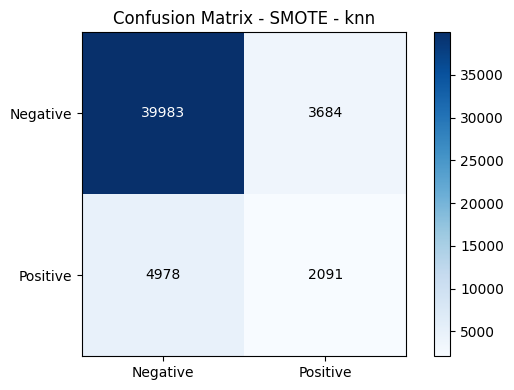

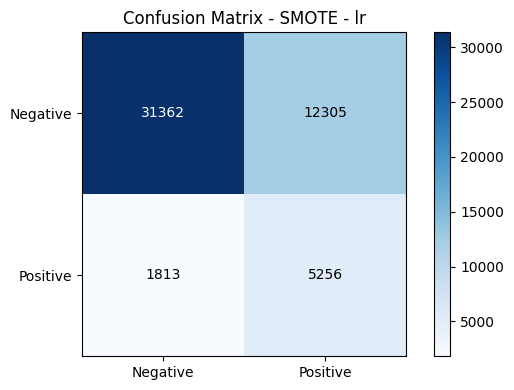

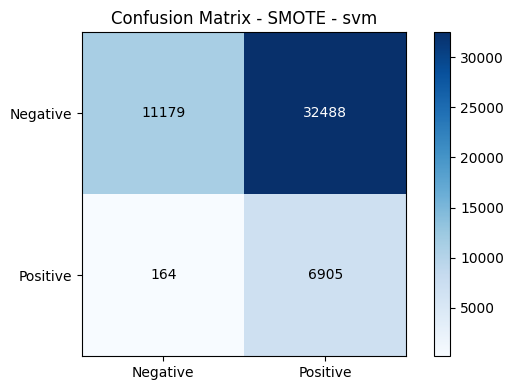

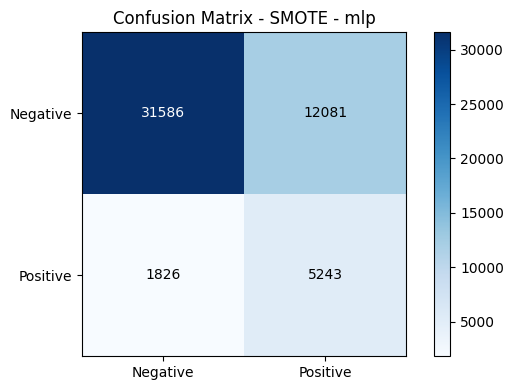

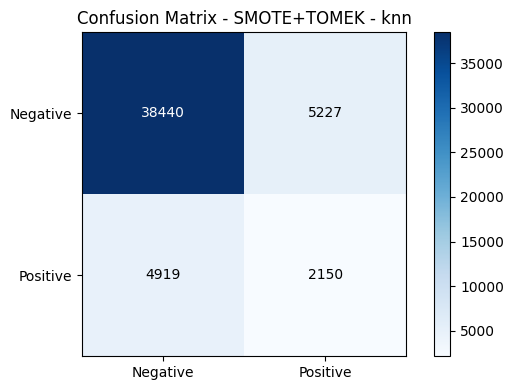

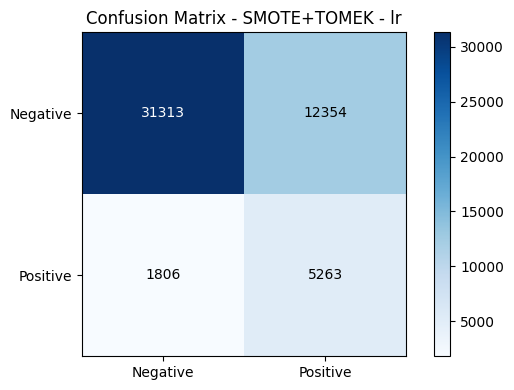

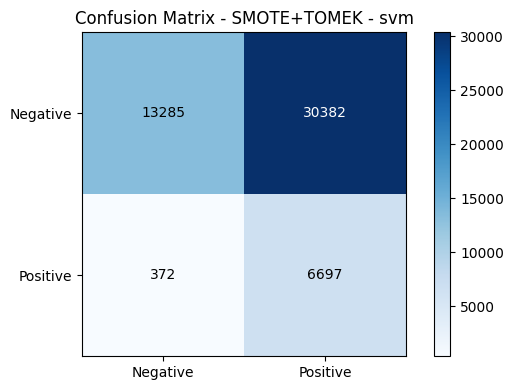

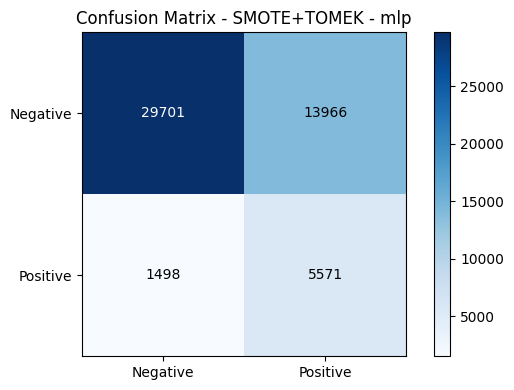

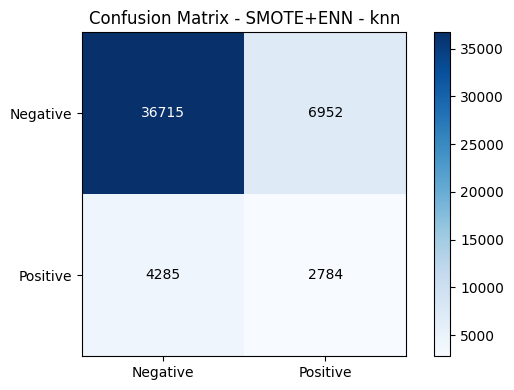

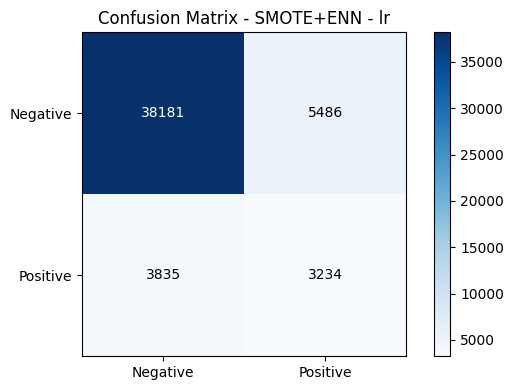

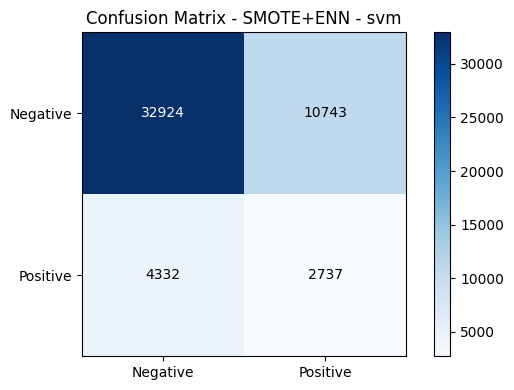

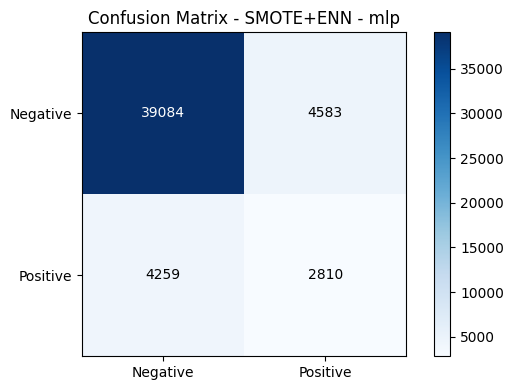

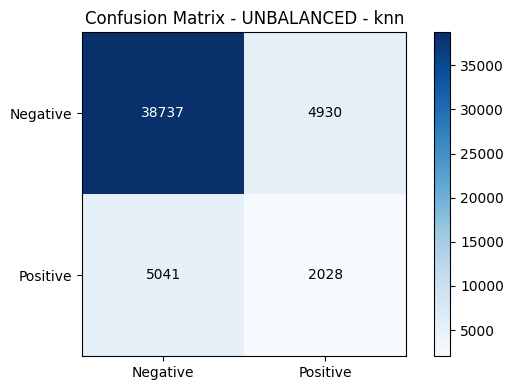

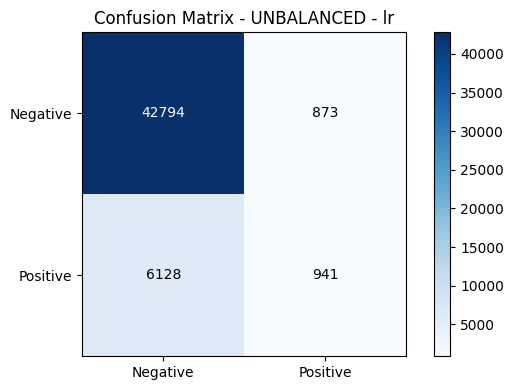

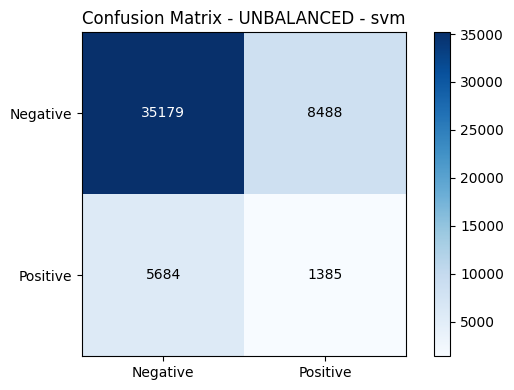

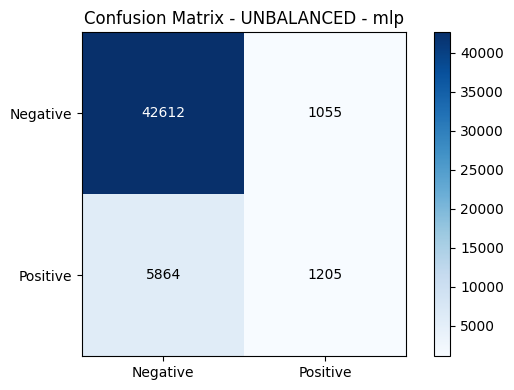

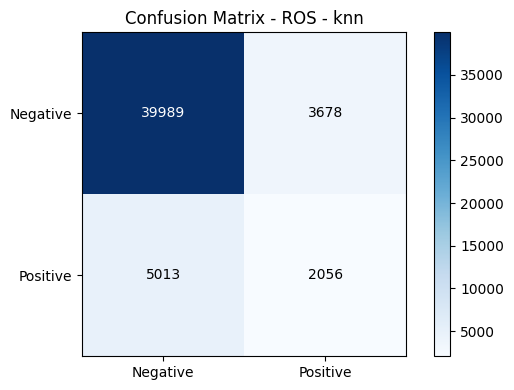

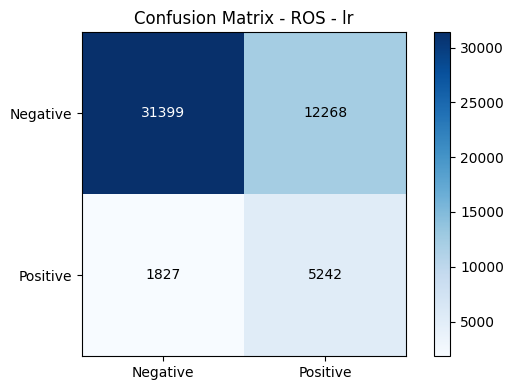

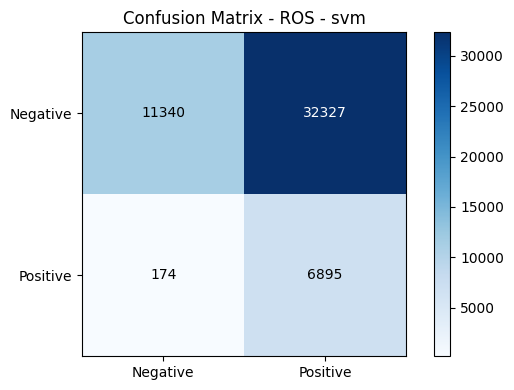

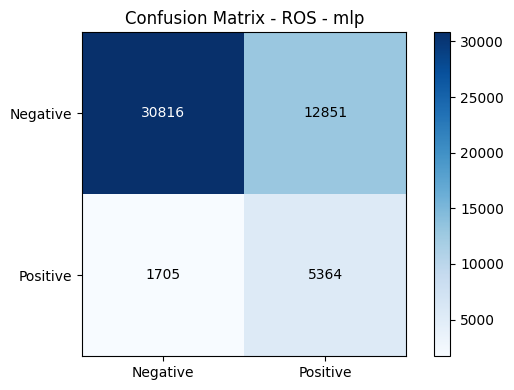

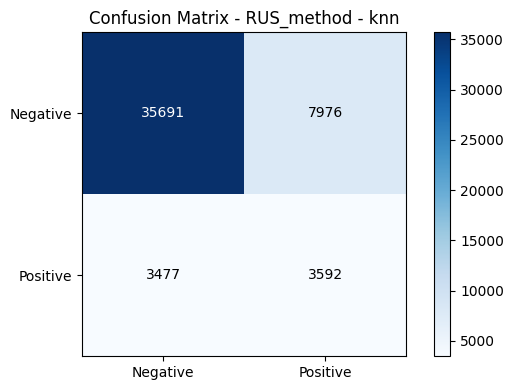

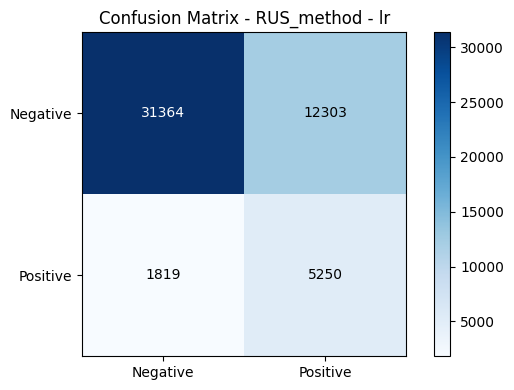

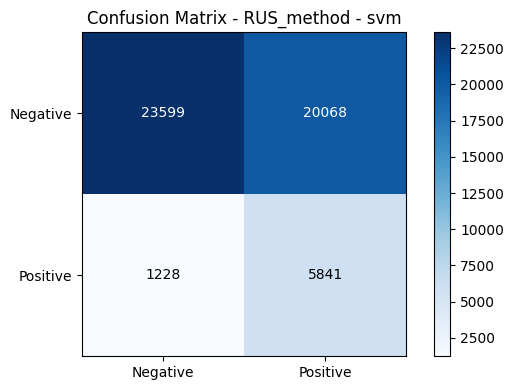

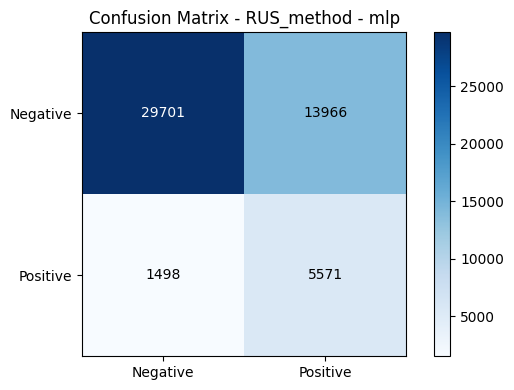

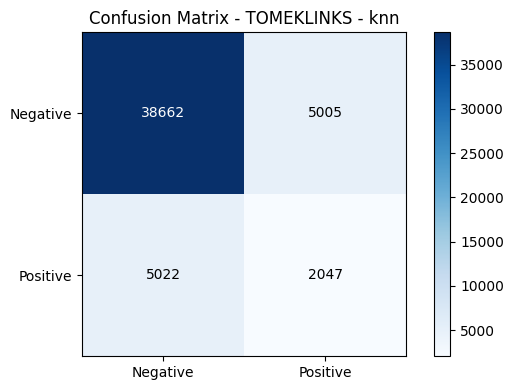

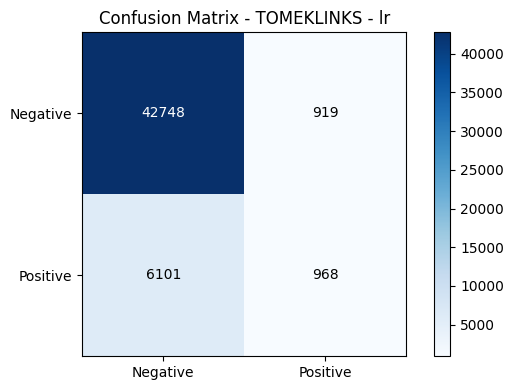

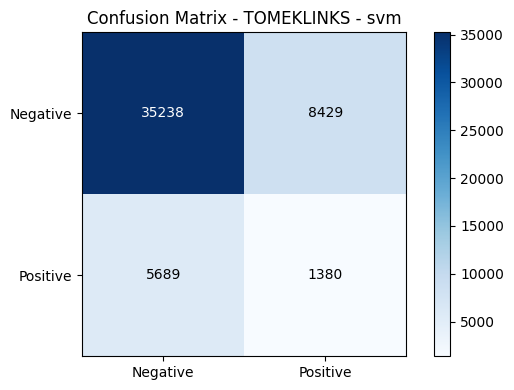

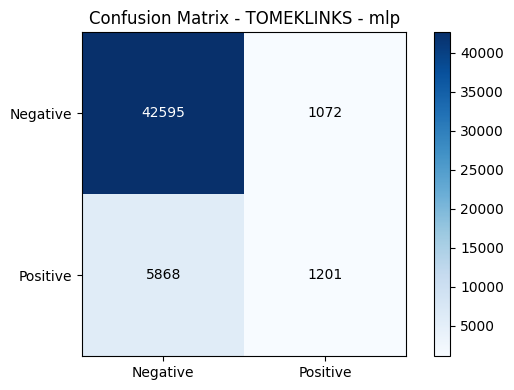

In [25]:
import matplotlib.pyplot as plt; import numpy as np

confusion_matrices = {}
for method, models in results.items():
    confusion_matrices[method] = {model_name: model_data['confusion'] for model_name, model_data in models.items()}

for method, model_confusion_matrices in confusion_matrices.items():
    for model_name, confusion_matrix in model_confusion_matrices.items():
        plt.figure(figsize=(6, 4))
        plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
        plt.title(f'Confusion Matrix - {method} - {model_name}')
        plt.colorbar()
        classes = ['Negative', 'Positive'] 
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)
        thresh = confusion_matrix.max() / 2.
        for i in range(confusion_matrix.shape[0]):
            for j in range(confusion_matrix.shape[1]):
                plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if confusion_matrix[i, j] > thresh else "black")
        plt.tight_layout()
        plt.show()


<h2> SVM Bar Charts

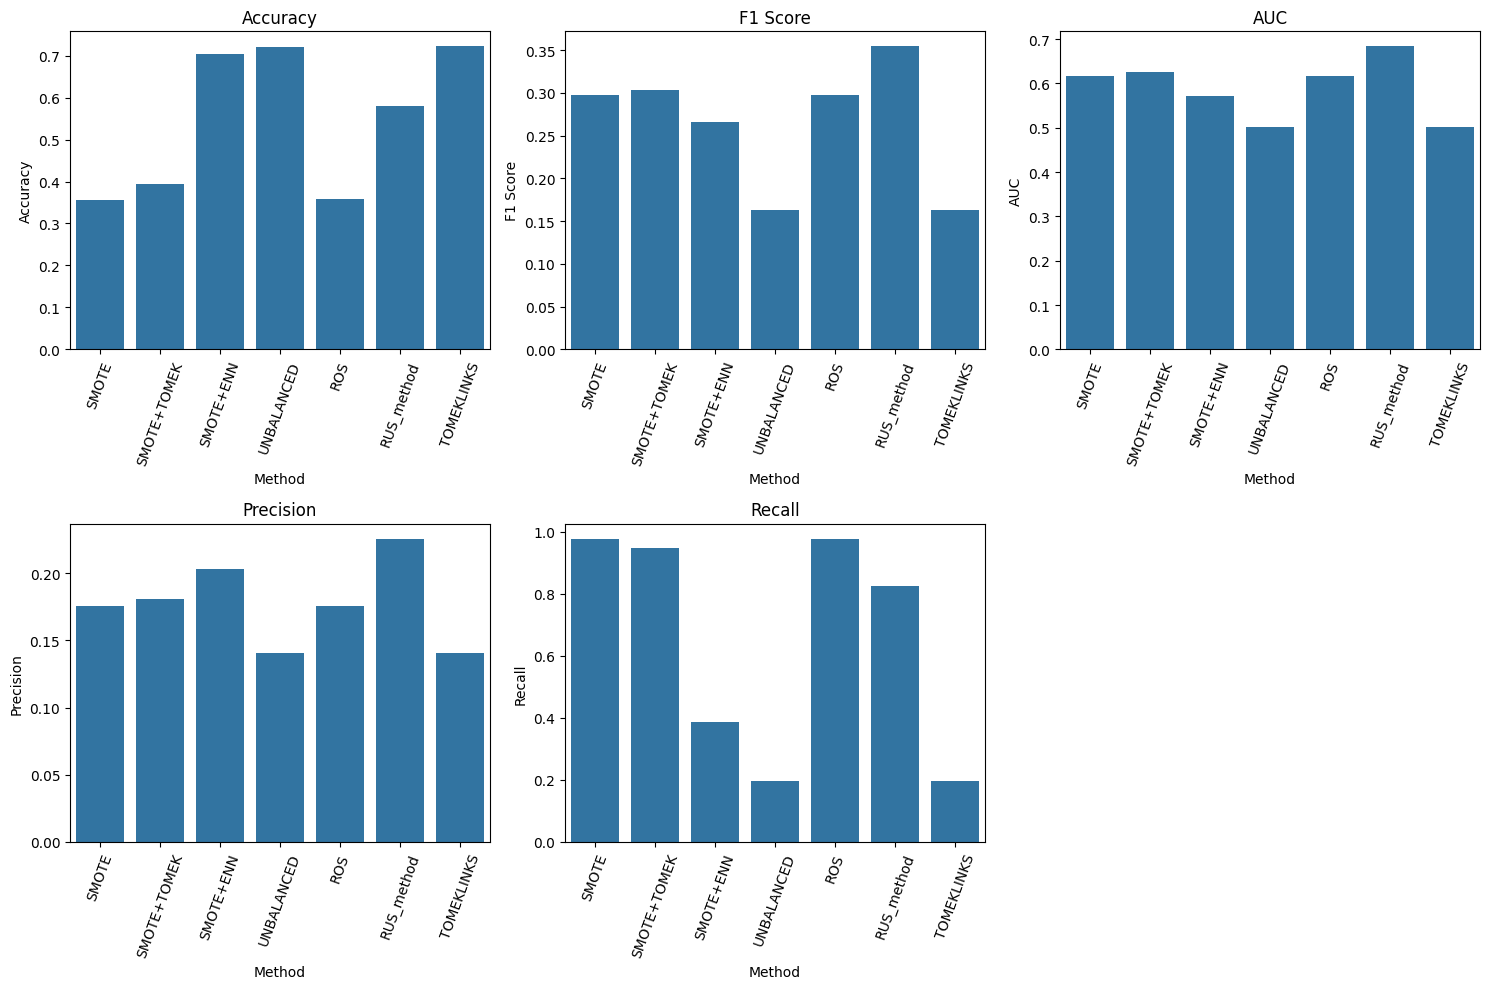

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

methods = []; accuracy = []; f1_score = []; auc = []; precision = []; recall = []

for method, metrics in results.items():
    methods.append(method)
    accuracy.append(metrics['svm']['accuracy'])
    f1_score.append(metrics['svm']['f1'])
    auc.append(metrics['svm']['auc'])
    precision.append(metrics['svm']['precision'])
    recall.append(metrics['svm']['recall'])

data = {
    'Method': methods,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'AUC': auc,
    'Precision': precision,
    'Recall': recall}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.barplot(x='Method', y='Accuracy', data=df)
plt.title('Accuracy')
plt.xticks(rotation=70)

plt.subplot(2, 3, 2)
sns.barplot(x='Method', y='F1 Score', data=df)
plt.title('F1 Score')
plt.xticks(rotation=70)

plt.subplot(2, 3, 3)
sns.barplot(x='Method', y='AUC', data=df)
plt.title('AUC')
plt.xticks(rotation=70)

plt.subplot(2, 3, 4)
sns.barplot(x='Method', y='Precision', data=df)
plt.title('Precision')
plt.xticks(rotation=70)

plt.subplot(2, 3, 5)
sns.barplot(x='Method', y='Recall', data=df)
plt.title('Recall')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


<h2> LR Bar Charts

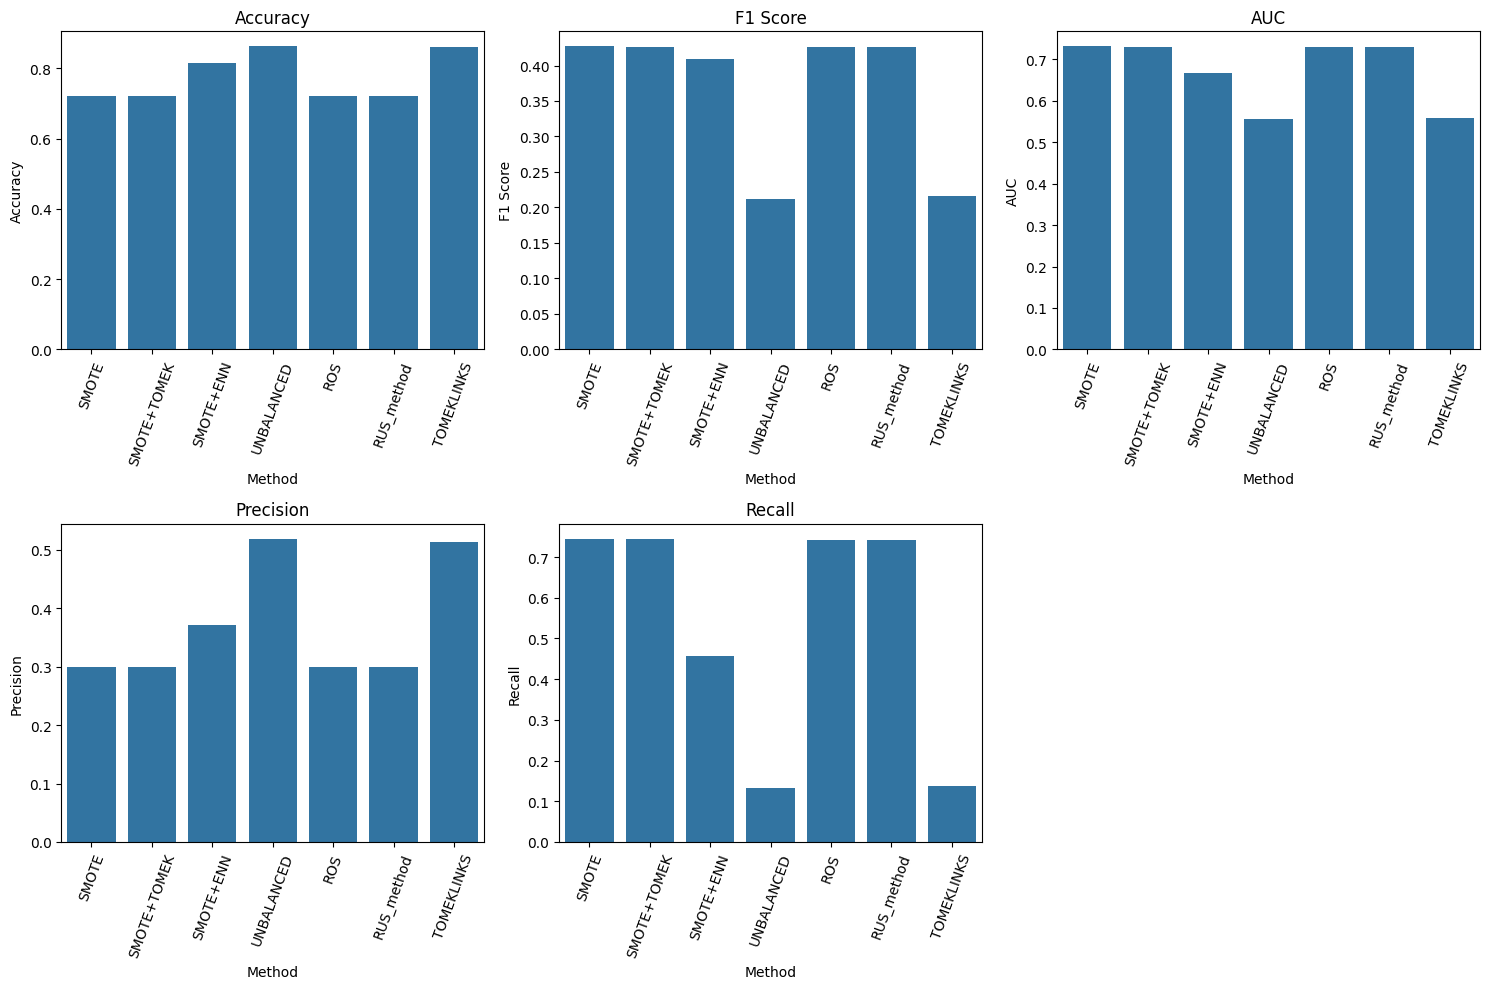

In [27]:
methods = []; accuracy = []; f1_score = []; auc = []; precision = []; recall = []

for method, metrics in results.items():
    methods.append(method)
    accuracy.append(metrics['lr']['accuracy'])
    f1_score.append(metrics['lr']['f1'])
    auc.append(metrics['lr']['auc'])
    precision.append(metrics['lr']['precision'])
    recall.append(metrics['lr']['recall'])

data = {
    'Method': methods,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'AUC': auc,
    'Precision': precision,
    'Recall': recall}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.barplot(x='Method', y='Accuracy', data=df)
plt.title('Accuracy')
plt.xticks(rotation=70)

plt.subplot(2, 3, 2)
sns.barplot(x='Method', y='F1 Score', data=df)
plt.title('F1 Score')
plt.xticks(rotation=70)

plt.subplot(2, 3, 3)
sns.barplot(x='Method', y='AUC', data=df)
plt.title('AUC')
plt.xticks(rotation=70)

plt.subplot(2, 3, 4)
sns.barplot(x='Method', y='Precision', data=df)
plt.title('Precision')
plt.xticks(rotation=70)

plt.subplot(2, 3, 5)
sns.barplot(x='Method', y='Recall', data=df)
plt.title('Recall')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


<h2> KNN Bar Charts

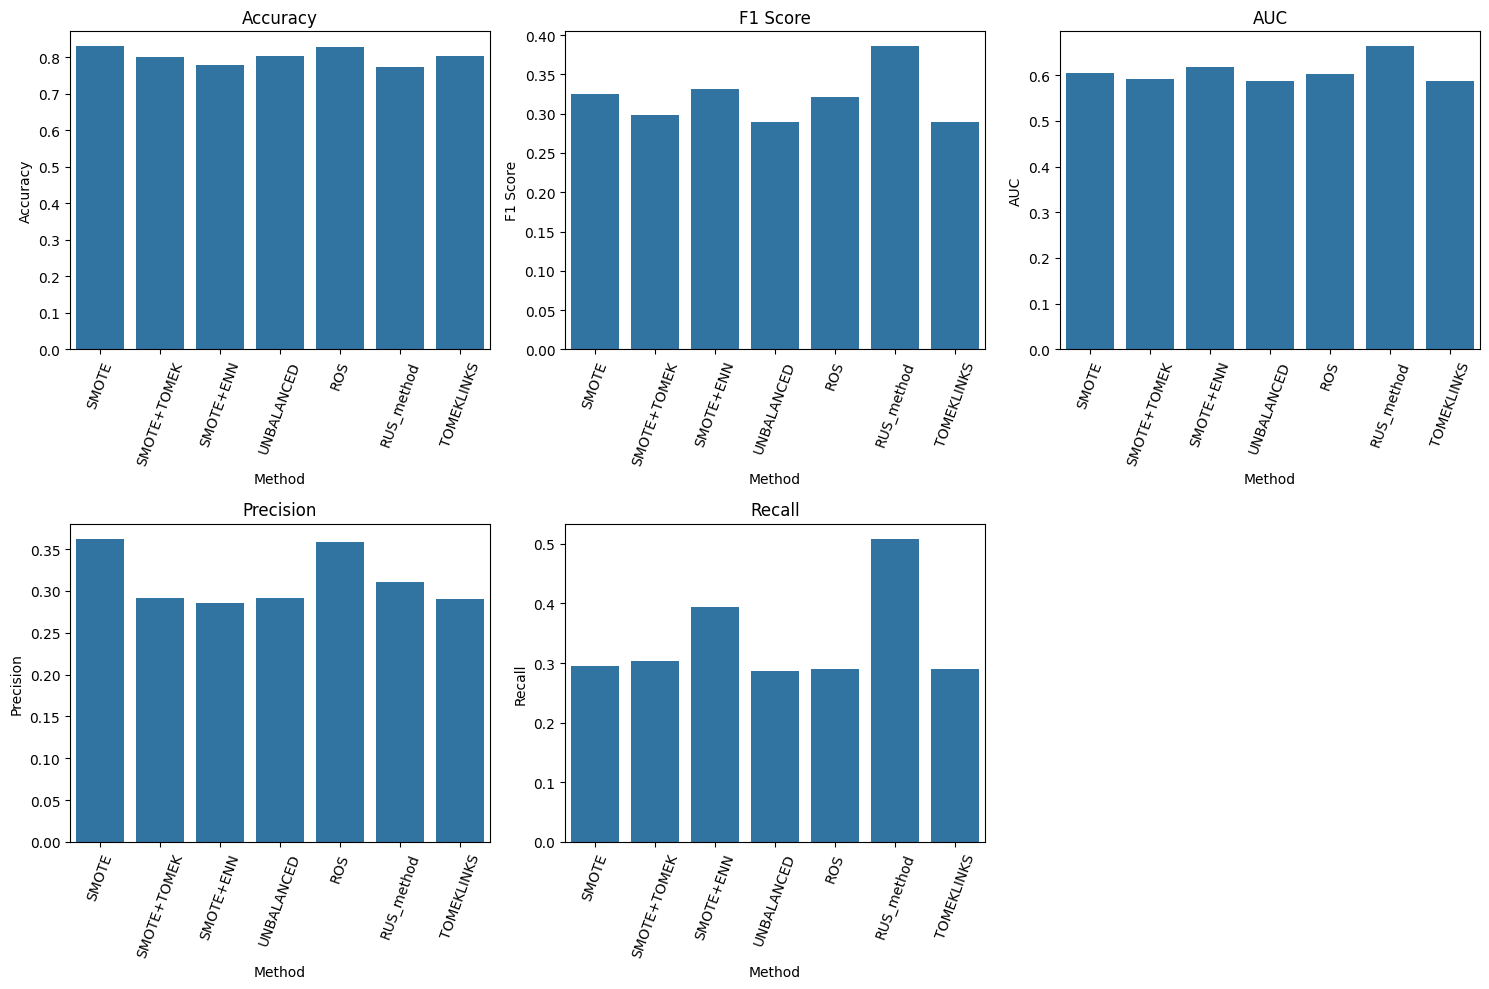

In [28]:
methods = []; accuracy = []; f1_score = []; auc = []; precision = []; recall = []

for method, metrics in results.items():
    methods.append(method)
    accuracy.append(metrics['knn']['accuracy'])
    f1_score.append(metrics['knn']['f1'])
    auc.append(metrics['knn']['auc'])
    precision.append(metrics['knn']['precision'])
    recall.append(metrics['knn']['recall'])

data = {
    'Method': methods,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'AUC': auc,
    'Precision': precision,
    'Recall': recall}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.barplot(x='Method', y='Accuracy', data=df)
plt.title('Accuracy')
plt.xticks(rotation=70)

plt.subplot(2, 3, 2)
sns.barplot(x='Method', y='F1 Score', data=df)
plt.title('F1 Score')
plt.xticks(rotation=70)

plt.subplot(2, 3, 3)
sns.barplot(x='Method', y='AUC', data=df)
plt.title('AUC')
plt.xticks(rotation=70)

plt.subplot(2, 3, 4)
sns.barplot(x='Method', y='Precision', data=df)
plt.title('Precision')
plt.xticks(rotation=70)

plt.subplot(2, 3, 5)
sns.barplot(x='Method', y='Recall', data=df)
plt.title('Recall')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


<h2> Mlp bar charts

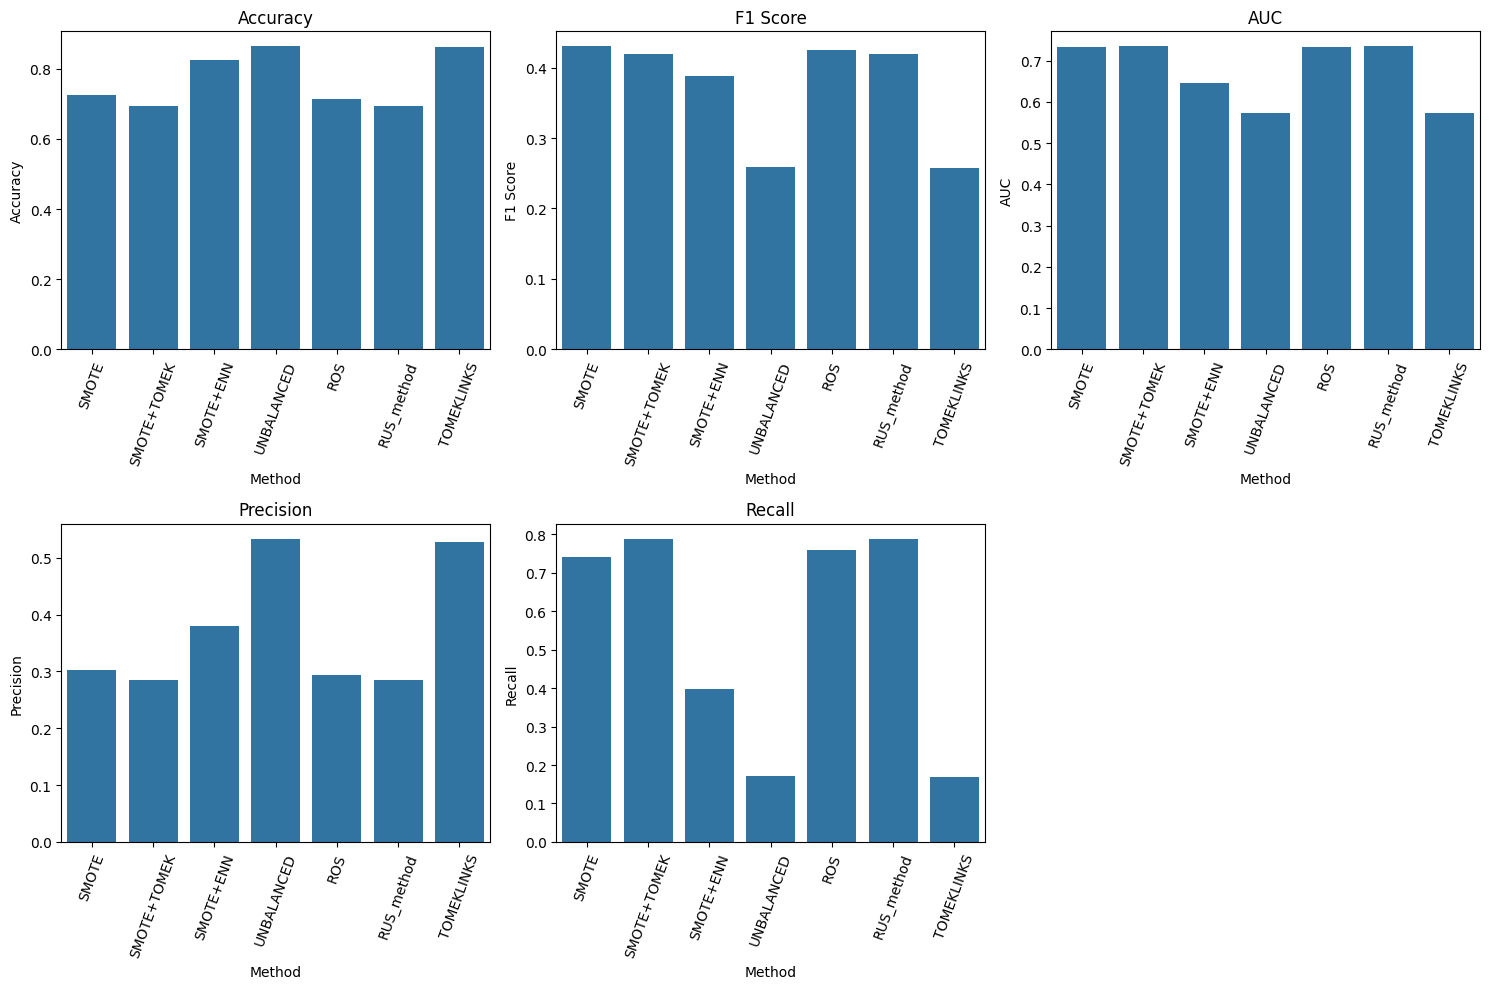

In [29]:
methods = []; accuracy = []; f1_score = []; auc = []; precision = []; recall = []

for method, metrics in results.items():
    methods.append(method)
    accuracy.append(metrics['mlp']['accuracy'])
    f1_score.append(metrics['mlp']['f1'])
    auc.append(metrics['mlp']['auc'])
    precision.append(metrics['mlp']['precision'])
    recall.append(metrics['mlp']['recall'])

data = {
    'Method': methods,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'AUC': auc,
    'Precision': precision,
    'Recall': recall}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.barplot(x='Method', y='Accuracy', data=df)
plt.title('Accuracy')
plt.xticks(rotation=70)

plt.subplot(2, 3, 2)
sns.barplot(x='Method', y='F1 Score', data=df)
plt.title('F1 Score')
plt.xticks(rotation=70)

plt.subplot(2, 3, 3)
sns.barplot(x='Method', y='AUC', data=df)
plt.title('AUC')
plt.xticks(rotation=70)

plt.subplot(2, 3, 4)
sns.barplot(x='Method', y='Precision', data=df)
plt.title('Precision')
plt.xticks(rotation=70)

plt.subplot(2, 3, 5)
sns.barplot(x='Method', y='Recall', data=df)
plt.title('Recall')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


<h2> Hyperparameters

KNN Hyperparameters: 'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9]

LR Hyperparameters:   'C': [0.001, 0.01, 0.1, 1, 10, 100],
                      'penalty': ['l1', 'l2'],
                      'solver': ['liblinear', 'saga'],
                      'max_iter': [500, 1000, 2000, 3000, 4000]

SVM Hyperparameters:        'learning_rate': [0.001, 0.01, 0.1],
                            'lambda_param': [0.01, 0.1, 1],
                            'n_iters': [1000, 2000]

In [32]:
# Smote + Tomek
print(smote_tomek_mlp.get_params(),"\n", smote_tomek_lr.get_params(),"\n", smote_tomek_knn.get_params(), "\n","SVM:", smote_tomek_svm.n_iters, smote_tomek_svm.batch_size, smote_tomek_svm.lambda_param, smote_tomek_svm.lr)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 92, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
 {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'} 
 SVM: 2000 100 1 0.001


In [33]:
# Unbalanced
print(unbalanced_mlp.get_params(),"\n",unbalanced_lr.get_params(),"\n", unbalanced_knn.get_params(),"\n","SVM:", unbalanced_svm.n_iters, unbalanced_svm.batch_size, unbalanced_svm.lambda_param, unbalanced_svm.lr)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 92, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
 {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'} 
 SVM: 2000 100 1 0.001


In [34]:
# RUS Method
print(RUS_method_mlp.get_params(),"\n", RUS_method_lr.get_params(),"\n", RUS_method_knn.get_params(),"\n", "SVM:", RUS_method_svm.n_iters, RUS_method_svm.batch_size, RUS_method_svm.lambda_param, RUS_method_svm.lr)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 92, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'} 
 SVM: 1000 100 1 0.001


In [35]:
# ROS
print(ROS_mlp.get_params(),"\n", ROS_lr.get_params(),"\n", ROS_knn.get_params(),"\n", "SVM:", ROS_svm.n_iters, ROS_svm.batch_size, ROS_svm.lambda_param, ROS_svm.lr)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 92, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'} 
 SVM: 1000 100 0.01 0.001
